In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import scipy.stats as st
%matplotlib inline

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [3]:
# Load the dataset
df = pd.read_csv("final_dataset.csv")
columns_drop=['SEQN']
df=df.drop(columns=columns_drop, axis=1)
# Let us replace 1 and 2 in the gender column with 0 and 1
df['Gender'].replace([1, 2], [0, 1], inplace=True)
#df=df.fillna(0)
df

,Gender,Age,Marital_status,Pregnant,current_drinker,former_drinker_x,current_smoker,former_drinker_y,Aspirin_use,High_Blood_pressure,High_Cholestrol,Chest_pain,stomach problem,Chest Cold,Pneu_flu_ear infection,HIV,Health_cond,Diabetes,Difficulty Hearing,Difficulty Seeing,Drug Addict,Hepatitis_B,Hepatitis_C,hospitalized,days_hospitalised,Weak Kidney,Dialysis,Kidney Stone,Pesticide_used,asthma,asthma_current,anemia,overweight,blood_transfusion,arthritis,gout,congestive heart failure,coronary heart disease,heart attack,stroke,emphysema,thyroid,chronic bronchitis,current_chronic bronchitis,liver problem,COPD,jaundice,cancer,kidney_cancer,Farmer,smoked_in_pregnancy,Prescribed_medicine,Env_Subsamp_B_wts_x,"2,4-D","3,5,6-trichloropyridinol",4-fluoro-3-phenoxy-benzoic acid,3-phenoxybenzoic acid,Oxypyrimidine,para-Nitrophenol,Dichlorovnl-dimeth prop carboacid,Malathion diacid,Env_Subsamp_B_wts_y,Dimethylphosphate,Diethylphosphate,Dimethylthiophosphate,Diethylthiophosphate,Dimethyldithiophosphate,Diethyldithiophosphate,surplus specimen_B_2y_wts,Imidacloprid,Acetamiprid,Clothianidin,Thiacloprid,5-Hydroxyimidacloprid,N-Desmethylacetamiprid,surplus specimen_GLYP_2y_wts,Glyphosate,UACR
0,1,42,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1,44132.048218,0.21,1.50,0.07,5.60,0.95,1.10,2.00,0.35,44132.048218,1.640,8.230,0.302,0.485,0.105,0.07,59113.041721,0.28,0.21,0.14,0.02,0.280,0.14,59113.041721,0.342,0
1,0,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0,46173.307234,0.32,0.74,0.07,0.23,0.07,5.20,0.42,0.35,46173.307234,0.686,7.560,0.070,0.070,0.070,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0
2,1,15,0,0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,NaN,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,0,83710.974098,0.64,1.30,0.07,9.70,0.23,1.10,9.20,0.35,83710.974098,1.040,2.690,0.669,0.266,0.205,0.07,105572.288671,0.28,0.21,0.14,0.02,0.625,0.14,105572.288671,0.609,0
3,1,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0,11273.997898,0.35,0.81,0.07,0.39,0.07,0.61,0.42,0.35,11273.997898,3.670,4.460,4.750,2.620,0.271,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0
4,0,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,1,11184.295239,0.22,0.20,0.07,0.36,0.07,0.22,0.42,0.35,11184.295239,0.422,0.618,0.366,0.070,0.070,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,0,53,1,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,67721.994612,0.11,0.19,0.42,0.20,0.07,0.31,0.42,0.35,67721.994612,9.250,0.416,19.300,0.167,4.560,0.07,74510.404189,0.28,0.21,0.14,0.02,0.280,NaN,74510.404189,0.269,0
6217,0,53,1,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,67721.994612,0.11,0.19,0.42,0.20,0.07,0.31,0.42,0.35,67721.994612,9.250,0.416,19.300,0.167,4.560,0.07,74510.404189,0.28,0.21,0.14,0.02,0.280,NaN,74510.404189,0.269,0

In [4]:
health_condition = pd.get_dummies(df['Health_cond'], drop_first=True,dtype=int)
print(health_condition.head())
df.drop(['Health_cond','current_chronic bronchitis','Drug Addict','Dialysis','asthma','asthma_current'], axis=1, inplace=True)
df = pd.concat([df, health_condition], axis =1)
df = df.rename(columns={1:'HC1', 2: 'HC2', 3: 'HC3', 4:'HC4',5:'HC5'}) # 4 binary columns enough to describe 5 categories
# checking for missing values, there are many rows with missing values
days_hospitalised = pd.get_dummies(df['days_hospitalised'], drop_first=True,dtype=int)
print(days_hospitalised.head())
df.drop(['days_hospitalised'], axis=1, inplace=True)
df = pd.concat([df, days_hospitalised], axis =1)
df = df.rename(columns={1:'days_hospitalised_1', 2: 'days_hospitalised_2', 3: 'days_hospitalised_3', 4:'days_hospitalised_4',5:'days_hospitalised_5',6:'days_hospitalised_6'}) 
df.shape

   2.0  3.0  4.0  5.0
0    0    0    1    0
1    0    0    0    0
2    0    1    0    0
3    0    0    0    0
4    0    0    0    0
   1.0  2.0  3.0  4.0  5.0  6.0
0    0    0    0    0    0    0
1    0    0    0    0    0    0
2    0    0    0    0    0    0
3    0    0    0    0    0    0
4    0    0    0    0    0    0


(6221, 81)

In [5]:
# Split the data into features (X) and target (y)
X = df.drop("UACR", axis=1)
y = df["UACR"]


In [6]:
#KNN
from sklearn.impute import KNNImputer
def impute_missing_values_knn(df, n_neighbors=3, weights='uniform', metric='nan_euclidean'):
    imputer = KNNImputer(n_neighbors=n_neighbors, weights=weights, metric=metric)
    X_imputed = imputer.fit_transform(df)
    missing_count = np.sum(np.isnan(X_imputed).flatten())
    X_columns = df.iloc[:, :]  # Select all columns
    df_knn = pd.DataFrame(X_imputed, columns=X_columns.columns)
    return df_knn


In [7]:
def test_trainsplit(X,y):
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    #print(X.dtypes)
    
    #Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    binary_cols = ['Gender','Marital_status', 'Pregnant', 'current_drinker',
       'former_drinker_x', 'current_smoker', 'former_drinker_y', 'Aspirin_use',
       'High_Blood_pressure', 'High_Cholestrol', 'Chest_pain',
       'stomach problem', 'Chest Cold', 'Pneu_flu_ear infection', 'HIV',
       'Diabetes', 'Difficulty Hearing', 'Difficulty Seeing',
       'Hepatitis_B', 'Hepatitis_C', 'hospitalized','Weak Kidney','Kidney Stone',
       'Pesticide_used', 'anemia', 'overweight','blood_transfusion', 'arthritis', 'gout', 'congestive heart failure',
       'coronary heart disease', 'heart attack', 'stroke', 'emphysema','thyroid', 'chronic bronchitis',
        'liver problem', 'COPD', 'jaundice', 'cancer', 'kidney_cancer','Farmer', 'smoked_in_pregnancy',
        'Prescribed_medicine','HC2','HC3','HC4','HC5',
      'days_hospitalised_2','days_hospitalised_3','days_hospitalised_4','days_hospitalised_5','days_hospitalised_6']
    binary_features=[col for col in X_train.columns if col in binary_cols]
    numerical_features=[col for col in X_train.columns if col not in binary_features]

    
    # Create a ColumnTransformer
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('bin', 'passthrough', binary_features)
    ])
   
        # Standardize the features
    #scaler = StandardScaler()
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    #y_train_series=pd.Series(y_train)
    #y_train_series.value_counts()
    return X_train, X_test, y_train, y_test 

In [8]:
import statsmodels.api as sm
# takes input - X(feature vector), y(target variable)
# prints significant columns with(p-value<0.05)
# outputs new dataframe with only significant features
# remove print statements when not needed
def get_p_values_significant_features(X,y):
    X = sm.add_constant(X)
    ols_model = sm.OLS(y, X).fit()
    p_features = {}
    for i in X.columns.tolist():
        p_features[f'{i}'] = ols_model.pvalues[i]

    data_pvalue= pd.DataFrame(p_features.items(), columns=['Feature_name', 'p-Value']).sort_values(by = 'p-Value').reset_index(drop=True)
    #print('*'*50
    
    
    
    #print('significant features')
    #print('*'*50)
    #print(data_pvalue[data_pvalue['p-Value']<0.05])
    significant_features = data_pvalue[data_pvalue['p-Value']<0.05]['Feature_name'].tolist()
    #print("significant_features:",X[significant_features].shape)
    
    return X[significant_features]



In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_imputed = impute_missing_values_knn(X)
X_significant = get_p_values_significant_features(X_imputed,y)
X_train, X_test, y_train, y_test = test_trainsplit(X_significant,y)
oversampler = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)



  File "C:\Users\priya\anaconda\envs\gwarproject\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\priya\anaconda\envs\gwarproject\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\priya\anaconda\envs\gwarproject\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\priya\anaconda\envs\gwarproject\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [17]:
#hyperparameters
max_depth = [2, 4, 6, 8, 10]
min_samples_leaf = [5, 10, 15]
criterion = ["gini", "entropy"]


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#from sklearn.tree import DecisionTreeClassifier
# get entropy for all nodes
def get_gain(info_gain):
    best_f1 = 0
    for i in max_depth:
        # Build a random forest classifier using the current hyperparameters
        nodes = RandomForestClassifier(n_estimators=100,max_depth=i,criterion=info_gain)
        nodes.fit(X_train, y_train)
        y_pred=nodes.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        F1_score = metrics.f1_score(y_test, y_pred, average='macro')
        precision = metrics.precision_score(y_test, y_pred, average='macro')
        recall = metrics.recall_score(y_test, y_pred, average='macro')
        #accuracy = nodes.score(X_test, y_test)
        if F1_score > best_f1:
            best_f1 = F1_score
            best_hyperparams = (i, info_gain, best_f1)
            # Print the hyperparameters and the test accuracy
        print(i, info_gain,F1_score)
    #print("Best hyperparameters:", best_hyperparams)
    return best_hyperparams




In [22]:
#gini index for all nodes
gini_index=get_gain(criterion[0])
print("\ngini_index optimal_hyperparameters=",gini_index)
#entropy for all nodes
entropy=get_gain(criterion[1])
print("\nentropy optimal_hyperparameters=",entropy)

2 gini 0.4476486246672582
4 gini 0.4607975255999658
6 gini 0.5664690052469303
8 gini 0.7299888401994115
10 gini 0.7907200038729406

gini_index optimal_hyperparameters= (10, 'gini', 0.7907200038729406)
2 entropy 0.4476486246672582
4 entropy 0.49029390026520586
6 entropy 0.5484547990697339
8 entropy 0.6907545069309775
10 entropy 0.7907200038729406

entropy optimal_hyperparameters= (10, 'entropy', 0.7907200038729406)


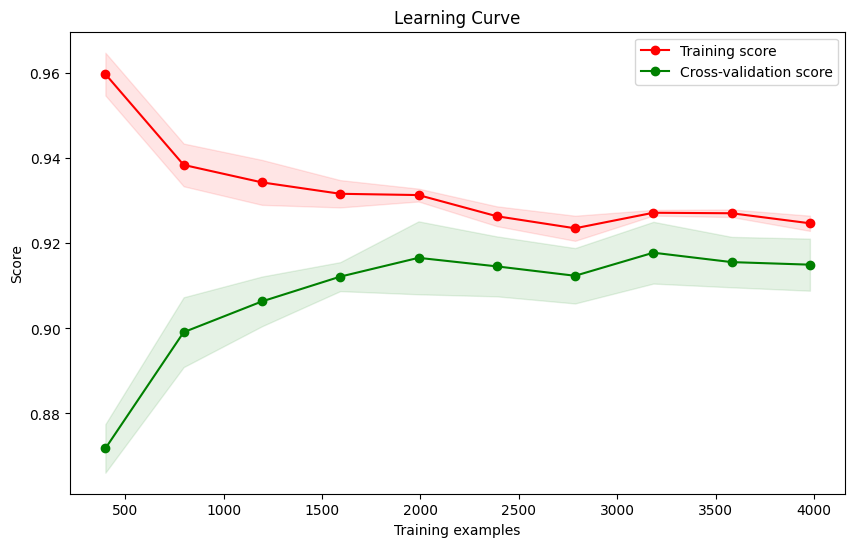

In [23]:
from sklearn.model_selection import learning_curve
# Define the classifier (replace this with your own classifier)
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, random_state=42)

# Create a learning curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    classifier, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), return_times=True
)

# Calculate mean and standard deviation for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()


